In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [74]:
fname_list = [
    # "pang_080723.json",
    # "nam_080723.json",
    "ploy_120723.json",
]
root_path = "dataset"
fname_list = [os.path.join(root_path, f) for f in fname_list]

In [75]:
data = []
for fname in fname_list:
    data += json.load(open(fname))

In [76]:
len(data)

150

In [77]:
def report_class(data):
    label_count = {}
    for motion in data:
        label = motion["label"]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    print(label_count)

In [78]:
report_class(data)

{0: 30, 1: 30, 2: 30, 3: 30, 4: 30}


# Movement Visualization

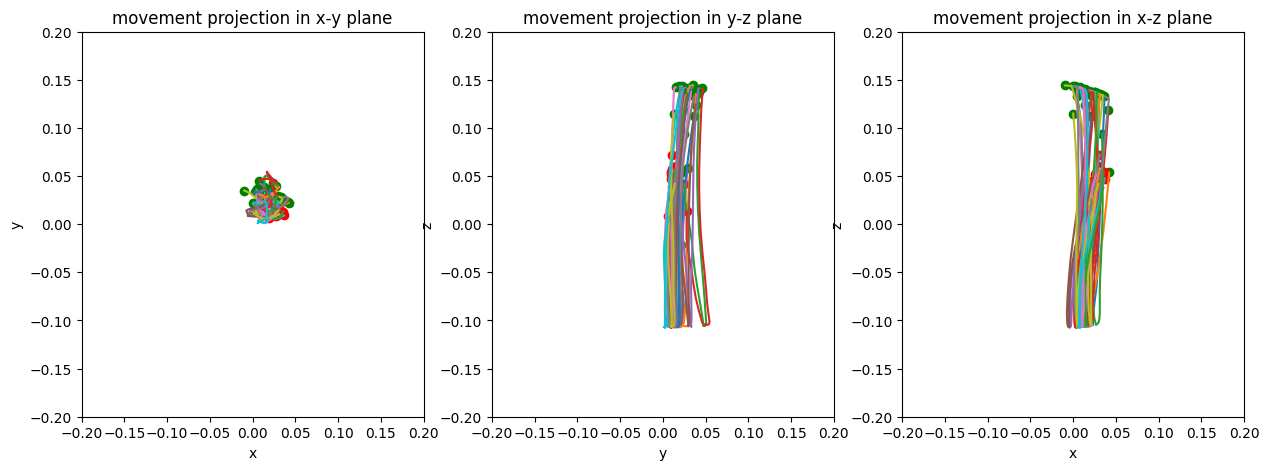

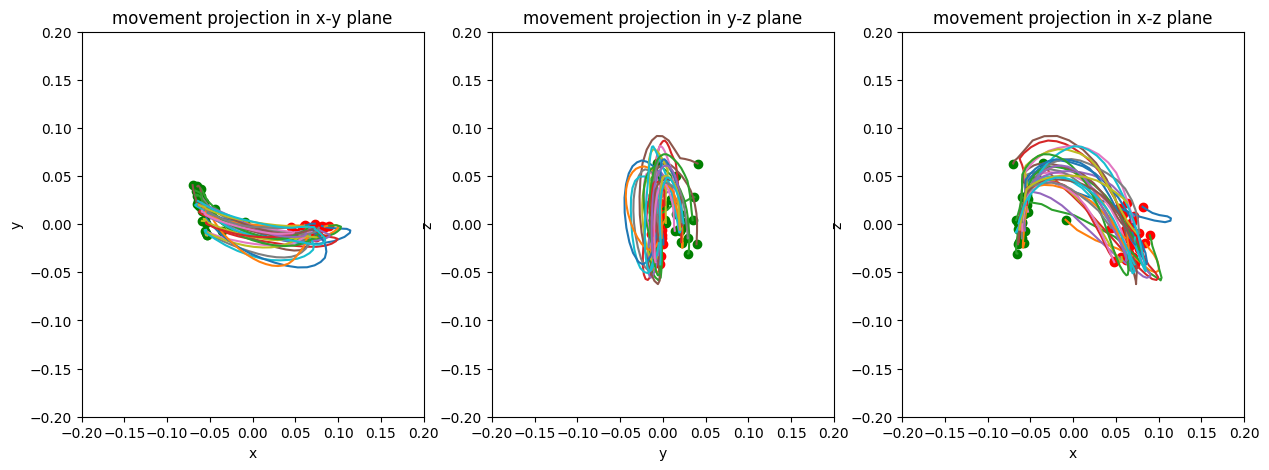

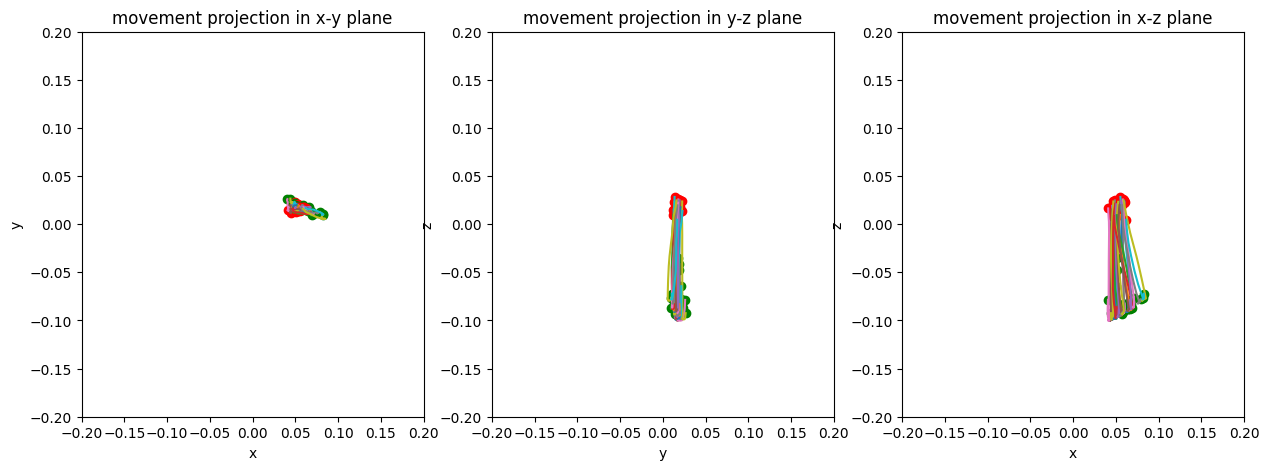

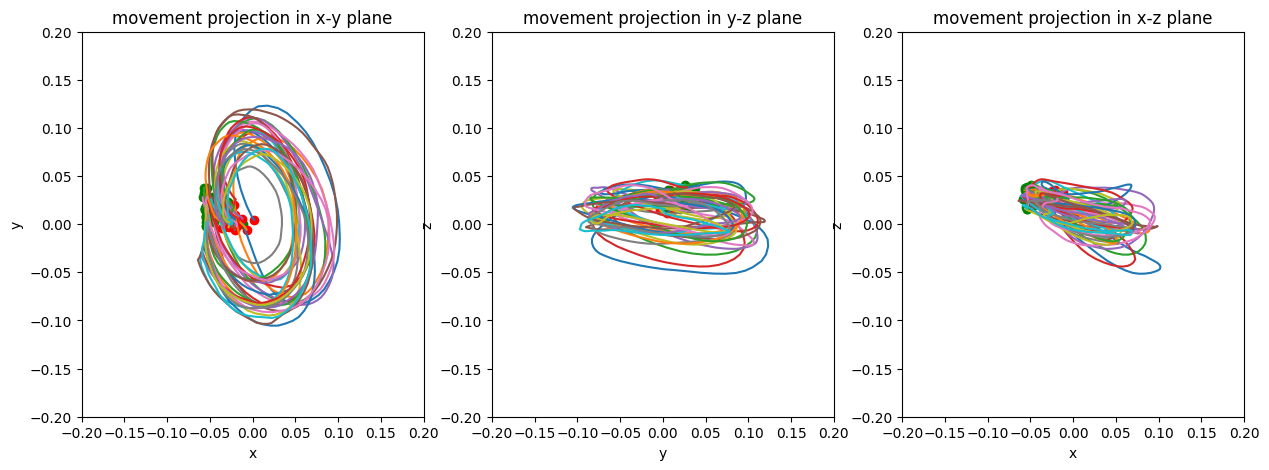

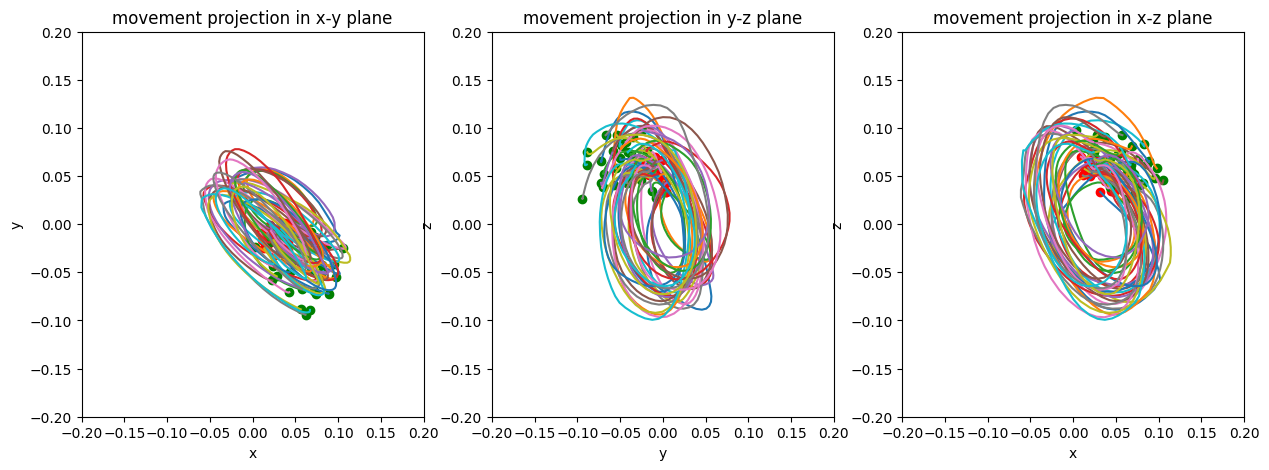

In [79]:
for i in range(5):
    movings = [x for x in data if x["label"] == i]
    movings_motion = [np.array(motion["motion"])[:,:3] for motion in movings]
    plt.figure(figsize=(15,5))
    for motion in movings_motion:
        plt.subplot(1,3,1)
        plt.plot(motion[:,0], motion[:,1], '-')
        plt.title("movement projection in x-y plane")
        plt.xlim(-0.2, 0.2)
        plt.ylim(-0.2, 0.2)
        plt.scatter(motion[0,0], motion[0,1], c='r')
        plt.scatter(motion[-1,0], motion[-1,1], c='g')
        plt.xlabel("x")
        plt.ylabel("y")
        

        plt.subplot(1,3,2)
        plt.plot(motion[:,1], motion[:,2], '-')
        plt.title("movement projection in y-z plane")
        plt.xlim(-0.2, 0.2)
        plt.ylim(-0.2, 0.2)
        plt.scatter(motion[0,1], motion[0,2], c='r')
        plt.scatter(motion[-1,1], motion[-1,2], c='g')
        plt.xlabel("y")
        plt.ylabel("z")


        plt.subplot(1,3,3)
        plt.plot(motion[:,0], motion[:,2], '-')
        plt.scatter(motion[0,0], motion[0,2], c='r')
        plt.scatter(motion[-1,0], motion[-1,2], c='g')
        plt.title("movement projection in x-z plane")
        plt.xlim(-0.2, 0.2)
        plt.ylim(-0.2, 0.2)
        plt.xlabel("x")
        plt.ylabel("z")

# Data Augmentation Visualization

In [87]:
def data_augment(tmp_x, n=5, translation=True, scale=True, origin=(0.04, 0.00, 0.02)):
    augment_data = []
    tmp_x_aug = tmp_x.copy()
    for i in range(n):

        if scale:
            factor = np.random.normal(loc=1.0, scale=0.2, size=1)
            tmp_x_aug = factor * (tmp_x_aug - np.array(origin)) + np.array(origin)

        if translation:
            offset = np.random.normal(loc=0.0, scale=0.03, size=3)
            tmp_x_aug = tmp_x_aug + offset
            
        augment_data.append(tmp_x_aug)
    augment_data = np.stack(augment_data)
    return augment_data

In [88]:
def visualise(motion, color='b'):
    plt.subplot(1,3,1)
    plt.plot(motion[:,0], motion[:,1], '-', c=color)
    plt.title("movement projection in x-y plane")
    plt.xlim(-0.2, 0.2)
    plt.ylim(-0.2, 0.2)
    plt.scatter(motion[0,0], motion[0,1], c='r')
    plt.scatter(motion[-1,0], motion[-1,1], c='g')
    plt.xlabel("x")
    plt.ylabel("y")
    

    plt.subplot(1,3,2)
    plt.plot(motion[:,1], motion[:,2], '-', c=color)
    plt.title("movement projection in y-z plane")
    plt.xlim(-0.2, 0.2)
    plt.ylim(-0.2, 0.2)
    plt.scatter(motion[0,1], motion[0,2], c='r')
    plt.scatter(motion[-1,1], motion[-1,2], c='g')
    plt.xlabel("y")
    plt.ylabel("z")


    plt.subplot(1,3,3)
    plt.plot(motion[:,0], motion[:,2], '-', c=color)
    plt.scatter(motion[0,0], motion[0,2], c='r')
    plt.scatter(motion[-1,0], motion[-1,2], c='g')
    plt.title("movement projection in x-z plane")
    plt.xlim(-0.2, 0.2)
    plt.ylim(-0.2, 0.2)
    plt.xlabel("x")
    plt.ylabel("z")

class:  0


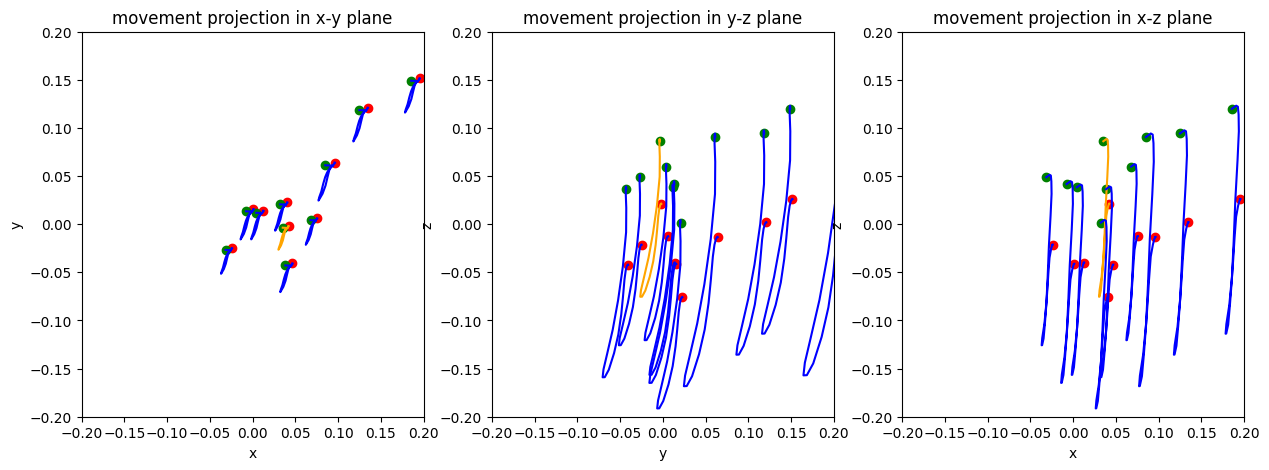

class:  1


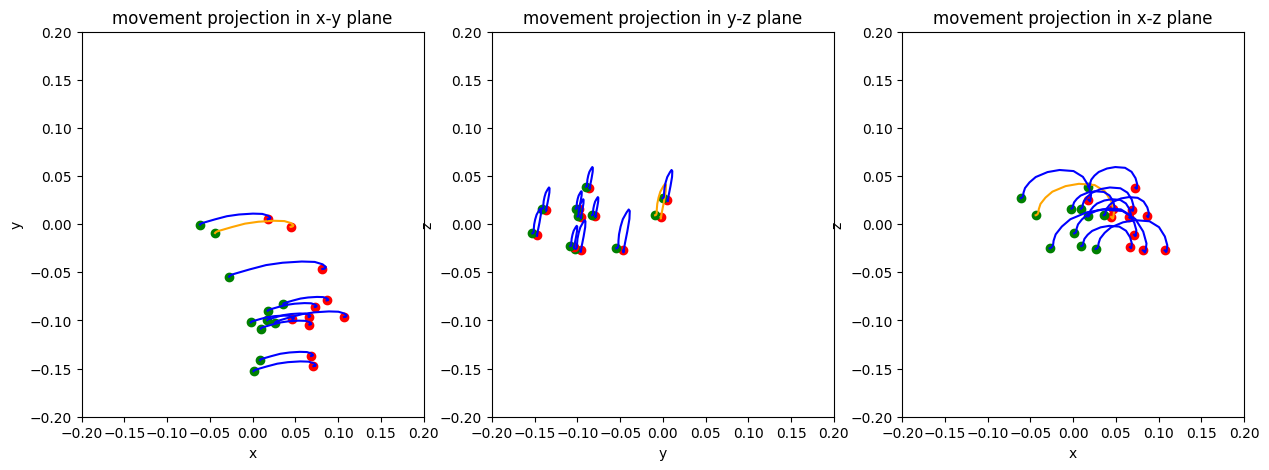

class:  2


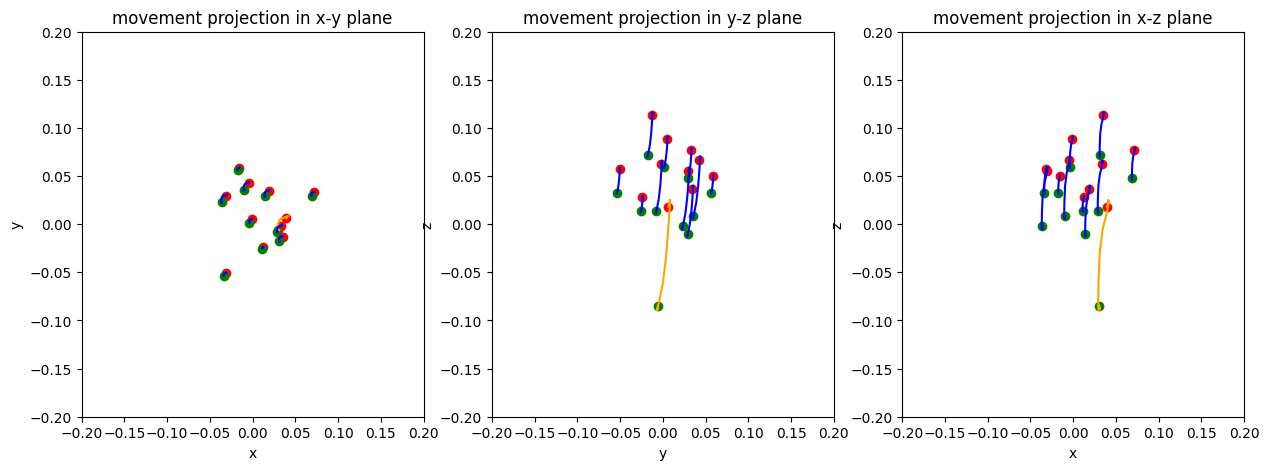

class:  3


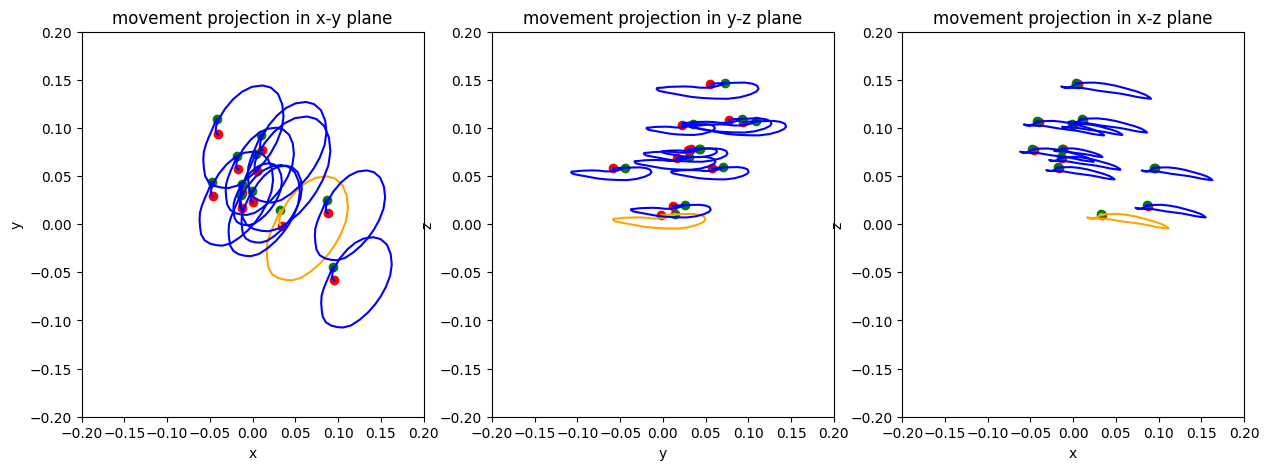

class:  4


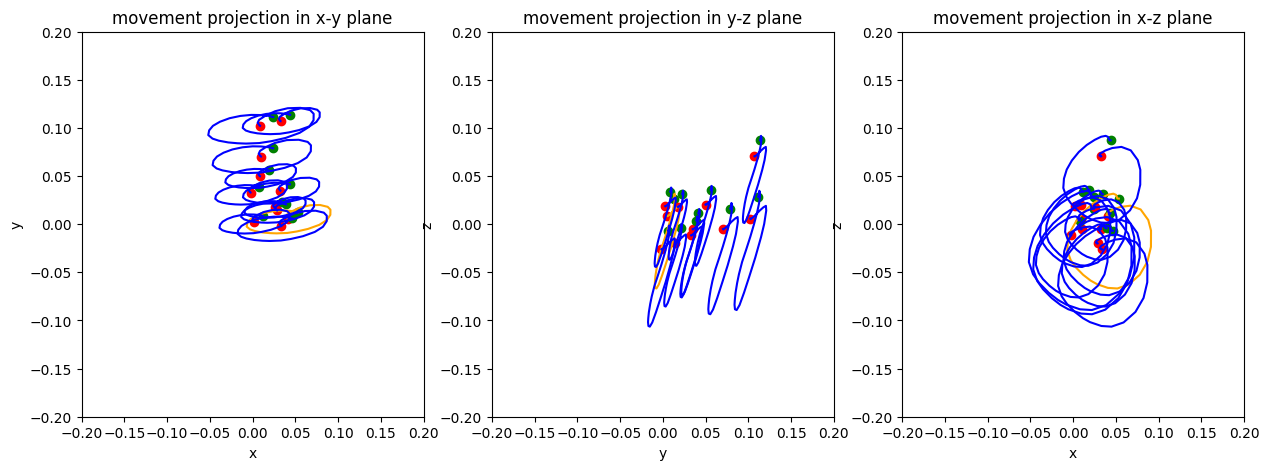

In [89]:
for c in range(5):
    print("class: ", c)
    movings = [x for x in data if x["label"] == c]
    movings_motion = [np.array(motion["motion"])[:,:3] for motion in movings]

    for motion in movings_motion[:1]:
        plt.figure(figsize=(15,5))
        visualise(motion, 'orange')
        augment_data_array = data_augment(motion, 10, translation=True, scale=True)
        for i in range(augment_data_array.shape[0]):
            visualise(augment_data_array[i], 'b')
        plt.show()